In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('../hba')
import visualization
import preprocessing

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [332]:
#ファイルの読込
df = pd.read_csv("../csv/全突合R4マスタ240524.csv")
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27926 entries, 0 to 27925
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   病院                                     27926 non-null  object
 1   医療機関名_x                                27926 non-null  object
 2   都道府県コード_x                              27926 non-null  object
 3   構想区域コード_x                              27926 non-null  object
 4   構想区域名称_x                               27926 non-null  object
 5   市区町村名称_x                               27926 non-null  object
 6   設置主体（2022（令和4）年7月1日時点）                 27926 non-null  object
 7   DPC医療機関群の種類                            27926 non-null  object
 8   特定機能病院の承認の有無                           27926 non-null  object
 9   地域医療支援病院の承認の有無                         27926 non-null  object
 10  総合入院体制加算の届出の有無                         27926 non-null  object
 11  急性期充実体制加算の届出の有無

/tmp/ipykernel_653/1539367363.py:2: DtypeWarning: Columns (2,3,15,16,17,18,19,20,21,22,24,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../csv/全突合R4マスタ240524.csv")


In [333]:
#スプシバグ手動修正
df.rename(columns={'施設全体_医師_常勤':'病棟コード\n（R4）', '施設全体_医師_非常勤':'病棟名_x', '病棟コード\n（R4）':'建築時期', '病棟名_x':'構造', '建築時期':'保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）',
        '保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）':'保有する病棟と機能区分の選択状況（2025年7月1日の病床機能の予定）'}, inplace=True)
df.drop(['医師_専従','医師_専任','救急車の受入件数','休日に受診した患者延べ数','休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数','夜間・時間外に受診した患者延べ数','夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数'],axis=1,inplace=True)
df.head()

,病院,医療機関名_x,都道府県コード_x,構想区域コード_x,構想区域名称_x,市区町村名称_x,設置主体（2022（令和4）年7月1日時点）,DPC医療機関群の種類,特定機能病院の承認の有無,地域医療支援病院の承認の有無,総合入院体制加算の届出の有無,急性期充実体制加算の届出の有無,三次救急医療施設の認定の有無,二次救急医療施設の認定の有無,救急告示病院の告示の有無,病棟コード\n（R4）,病棟名_x,建築時期,構造,保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）,保有する病棟と機能区分の選択状況（2025年7月1日の病床機能の予定）,一般病床_許可病床,一般病床_最大使用病床数,一般病床_最小使用病床数,療養病床_許可病床,療養病床_最大使用病床数,療養病床_最小使用病床数,新規入棟患者数（年間）,うち予定入院の患者・院内の他病棟からの転棟患者,うち、予定外の救急医療入院以外の入院患者（年間）,うち、予定外の救急医療入院の患者（年間）,在棟患者延べ数（年間）,退棟患者数（年間）,新規入棟患者数（年間）.1,うち、院内の他病棟からの転棟（年間）,うち、家庭からの入院（年間）,うち、他の病院、診療所からの転院（年間）,うち、介護施設、福祉施設からの入院（年間）,うち、介護医療院からの入院（年間）,うち、院内の出生（年間）,うち、その他（年間）,構想区域人口
0,病院,市立函館恵山病院,1,101,南渡島,函館市,市町村,ＤＰＣ病院ではない,無し,無し,届出無し,無し,無し,有り,有り,101010042101,病棟,2002,鉄筋コンクリート造,慢性期,慢性期,0,0,0,60,40,29,106,28,69,9,12371,110,106,0,43,28,35,0,0,0,359223
1,病院,医療法人社団玄心会吉田眼科病院,1,101,南渡島,函館市,医療法人,ＤＰＣ病院ではない,無し,無し,届出無し,無し,無し,無し,無し,101010069101,病棟,1983,鉄筋コンクリート造,急性期,急性期,40,40,10,0,0,0,1182,1120,0,62,9827,1184,1182,1171,0,1,10,0,0,0,359223
2,病院,市立函館病院,1,101,南渡島,函館市,市町村,ＤＰＣ標準病院群,無し,有り,総合入院体制加算２の届出有り,無し,有り,有り,有り,101010044101,３階東病棟,2000,鉄骨鉄筋コンクリート造,急性期,急性期,34,23,3,0,0,0,1184,592,560,32,5930,1172,1184,33,1026,6,0,0,119,0,359223
3,病院,市立函館病院,1,101,南渡島,函館市,市町村,ＤＰＣ標準病院群,無し,有り,総合入院体制加算２の届出有り,無し,有り,有り,有り,101010044102,３階南病棟（休床中）,2000,鉄骨鉄筋コンクリート造,休棟中（今後再開する予定）,高度急性期,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,359223
4,病院,市立函館病院,1,101,南渡島,函館市,市町村,ＤＰＣ標準病院群,無し,有り,総合入院体制加算２の届出有り,無し,有り,有り,有り,101010044103,４階東病棟,2000,鉄骨鉄筋コンクリート造,高度急性期,高度急性期,48,48,27,0,0,0,1008,566,66,376,16107,988,1008,259,677,26,46,0,0,0,359223


In [334]:
#ファイルの読込
add_df = pd.read_csv("../csv/全突合R4マスタ240527.csv")
add_df.columns = add_df.iloc[0]
add_df = add_df[1:].reset_index(drop=True)
add_df.head()

,休日に受診した患者延べ数,休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数,夜間・時間外に受診した患者延べ数,夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数,救急車の受入件数,施設全体_医師_常勤,施設全体_医師_非常勤,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,うち、予定外の救急医療入院の患者（年間）,在棟患者延べ数（年間）,退棟患者数（年間）,新規入棟患者数（年間）.1,うち、院内の他病棟からの転棟（年間）,うち、家庭からの入院（年間）,うち、他の病院、診療所からの転院（年間）,うち、介護施設、福祉施設からの入院（年間）,うち、介護医療院からの入院（年間）,うち、院内の出生（年間）,うち、その他（年間）,構想区域人口
0,60,30,104,40,66,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64,0,20,10,15,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2459,1052,2882,1181,5674,125,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2459,1052,2882,1181,5674,125,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2459,1052,2882,1181,5674,125,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [335]:
add_df = add_df[['休日に受診した患者延べ数','休日に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数',
                    '夜間・時間外に受診した患者延べ数','夜間・時間外に受診した患者延べ数_うち診察後直ちに入院となった患者延べ数',
                    '救急車の受入件数','施設全体_医師_常勤','施設全体_医師_非常勤']]
df = pd.concat([df, add_df], axis=1)
df.isnull().sum()

0
病院                                          0
医療機関名_x                                     0
都道府県コード_x                                   0
構想区域コード_x                                   0
構想区域名称_x                                    0
市区町村名称_x                                    0
設置主体（2022（令和4）年7月1日時点）                      0
DPC医療機関群の種類                                 0
特定機能病院の承認の有無                                0
地域医療支援病院の承認の有無                              0
総合入院体制加算の届出の有無                              0
急性期充実体制加算の届出の有無                             0
三次救急医療施設の認定の有無                              0
二次救急医療施設の認定の有無                              0
救急告示病院の告示の有無                                0
病棟コード\n（R4）                                 0
病棟名_x                                       0
建築時期                                     4425
構造                                          0
保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）       0
保有する病棟と機能区分の選択状況（2025年7月1日の病床機能の予定）         0
一般病床_許可病床                       

array([<Axes: ylabel='Count'>], dtype=object)

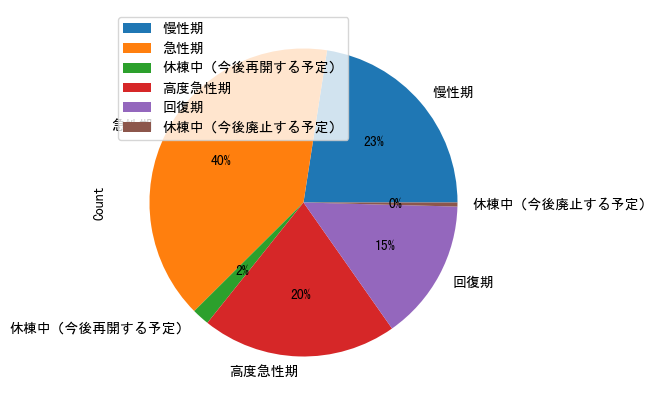

In [336]:
ward = preprocessing.tag_count(df["保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）"])
ward.plot.pie(subplots=True,figsize=(5, 5),autopct='%.f%%')

In [337]:
for col in df.columns: #object->float
    try:
        df[col] = pd.to_numeric(df[col], errors='raise')
    except ValueError:
        # 変換できない列は無視
        pass

df["病棟総病床数"] = df["一般病床_許可病床"] + df["療養病床_許可病床"]
df["院内総病床数"] = df.groupby("医療機関名_x")["病棟総病床数"].transform("sum")
df["病床数の全体に占める割合"]= df["病棟総病床数"] / df["院内総病床数"] * 100
df["施設全体_医師"] = df["施設全体_医師_常勤"] + df["施設全体_医師_非常勤"]
df = df.loc[df["保有する病棟と機能区分の選択状況（2022（令和4）年7月1日時点の機能）"] ==  "急性期"].reset_index(drop=True) #急性期病棟の抽出

PREF = ["都道府県コード_x","構想区域名称_x","休日に受診した患者延べ数","夜間・時間外に受診した患者延べ数",
        "救急車の受入件数","施設全体_医師","施設全体_医師_常勤"]
TARGETS = ["一般病床_許可病床","療養病床_許可病床","在棟患者延べ数（年間）","新規入棟患者数（年間）","退棟患者数（年間）","病床数の全体に占める割合"]
hdf = df.groupby('医療機関名_x')[PREF + TARGETS
                            ].agg({**{m:'first' for m in PREF},**{t:'sum' for t in TARGETS}}).reset_index()
hdf = hdf.join((df.groupby('構想区域名称_x')['構想区域人口'].apply(lambda x: x.mode()[0])), on='構想区域名称_x') #データ補正
hdf["病床利用率"] = hdf["在棟患者延べ数（年間）"] * 100 / (hdf["一般病床_許可病床"] + hdf["療養病床_許可病床"]) / 365 #診療実日数を365日とする
hdf["平均存棟日数"] = hdf["在棟患者延べ数（年間）"] / (hdf["新規入棟患者数（年間）"] + hdf["退棟患者数（年間）"]) * 2

In [338]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   医療機関名_x           4013 non-null   object 
 1   都道府県コード_x         4013 non-null   int64  
 2   構想区域名称_x          4013 non-null   object 
 3   休日に受診した患者延べ数      4013 non-null   int64  
 4   夜間・時間外に受診した患者延べ数  4013 non-null   int64  
 5   救急車の受入件数          4013 non-null   int64  
 6   施設全体_医師           4013 non-null   float64
 7   施設全体_医師_常勤        4013 non-null   int64  
 8   一般病床_許可病床         4013 non-null   int64  
 9   療養病床_許可病床         4013 non-null   int64  
 10  在棟患者延べ数（年間）       4013 non-null   int64  
 11  新規入棟患者数（年間）       4013 non-null   int64  
 12  退棟患者数（年間）         4013 non-null   int64  
 13  病床数の全体に占める割合      4013 non-null   float64
 14  構想区域人口            4013 non-null   int64  
 15  病床利用率             4013 non-null   float64
 16  平均存棟日数            3987 non-null   float64


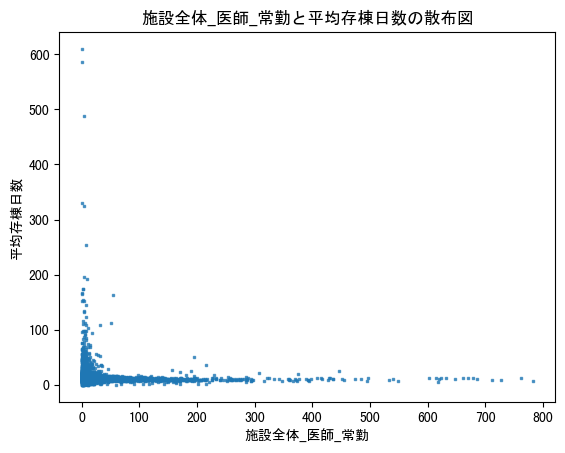

In [339]:
def plot_scatter(df, cols):
    x = df[cols[0]]
    y = df[cols[1]]

    plt.scatter(x, y, s=3, marker='s', alpha=0.7)

    plt.xlabel(cols[0])
    plt.ylabel(cols[1])

    plt.title(f'{cols[0]}と{cols[1]}の散布図')
    plt.show()
    return None

plot_scatter(hdf, ['施設全体_医師_常勤','平均存棟日数'])

#### 救急患者受入に関する評価基準について
1. 医療機関が受け入れた救急搬送患者 / 医療圏人口 *1000
2. 医療機関が受け入れた救急搬送患者 / 構想区域の総救急車受入件数 *100

In [340]:
hdf['構想区域人口あたりの救急車受入件数'] =  hdf['救急車の受入件数'] / hdf['構想区域人口'] * 1000
hdf['構想区域の総救急車受入件数'] = hdf.groupby('構想区域名称_x')['救急車の受入件数'].transform("sum")
hdf['救急車受入数の構想区域全体に占める割合'] = hdf['救急車の受入件数'] / hdf['構想区域の総救急車受入件数'] *100

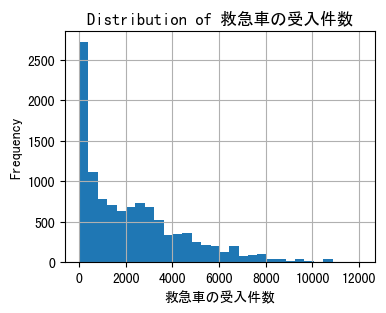

In [344]:
def plot_hist(col, bins=None):
    plt.figure(figsize=(4, 3))
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    return None

plot_hist('救急車の受入件数')

/workspace/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) MS Gothic.
  fig.canvas.draw()
/workspace/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) MS Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


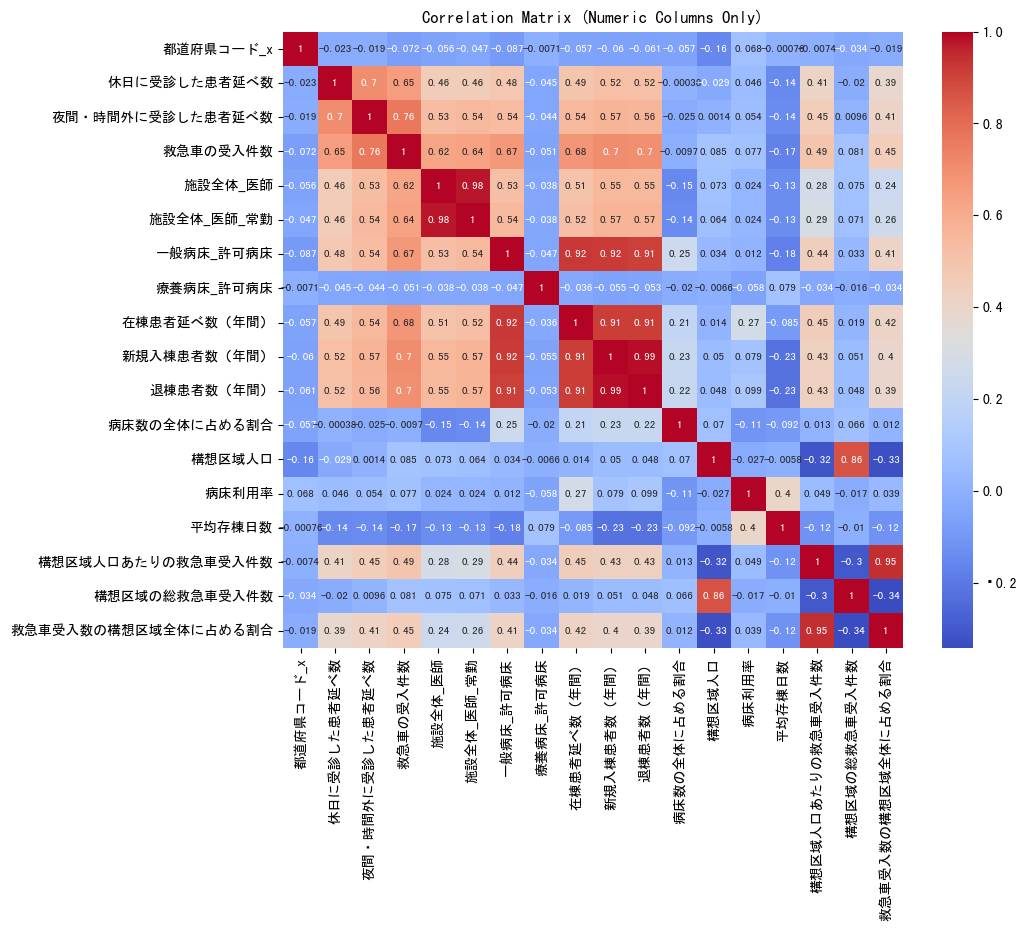

In [347]:
import seaborn as sns

numeric_cols = hdf.select_dtypes(exclude=[object]).columns
corr = hdf[numeric_cols].corr() #相関行列を計算

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()

In [345]:
hdf.head()

,医療機関名_x,都道府県コード_x,構想区域名称_x,休日に受診した患者延べ数,夜間・時間外に受診した患者延べ数,救急車の受入件数,施設全体_医師,施設全体_医師_常勤,一般病床_許可病床,療養病床_許可病床,在棟患者延べ数（年間）,新規入棟患者数（年間）,退棟患者数（年間）,病床数の全体に占める割合,構想区域人口,病床利用率,平均存棟日数,構想区域人口あたりの救急車受入件数,構想区域の総救急車受入件数,救急車受入数の構想区域全体に占める割合
0,AOI国際病院,14,川崎南部,1213,1649,2725,59.1,43,114,0,39388,3585,3610,34.756098,667767,94.659938,10.948714,4.080765,39132,6.963610
1,JA静岡厚生連遠州病院,22,西部,976,3481,3653,71.1,71,320,0,78466,6102,5637,80.000000,771746,67.179795,13.368430,4.733423,103724,3.521846
2,あいちせぼね病院,23,尾張北部,0,0,0,12.3,11,48,0,9412,1598,1604,100.000000,735278,53.721461,5.878826,0.000000,33518,0.000000
3,あおぞら病院,44,東部,55,30,60,5.9,3,30,0,10266,446,438,55.555556,1155470,93.753425,23.226244,0.051927,101383,0.059182
4,あおばウィメンズホスピタル,14,横浜,50,108,0,3.0,3,20,0,3928,876,876,100.000000,3777491,53.808219,4.484018,0.000000,143545,0.000000
